## Banknote Authentication Analysis

In [4]:
# Import necessary files

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

## Data Preparation

In [5]:
# Load data

data = pd.read_csv('data_banknote_authentication.txt',
    names = ['variance','skewness','curtosis','entropy','class'])

In [6]:
data.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [7]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
data.shape

(1372, 5)

In [9]:
data.isna().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [10]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
data['class'].unique()

array([0, 1], dtype=int64)

## Explotorary Data Analysis

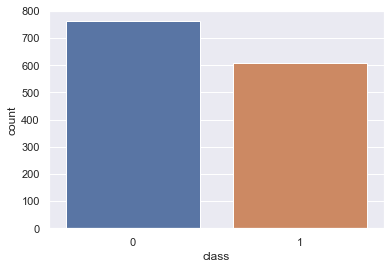

In [12]:
## Checking the spread of counterfiet banks note

sns.countplot(x='class', data= data)

### To estimate the kernal density of each feature  -  violin plots

#### Curtosis

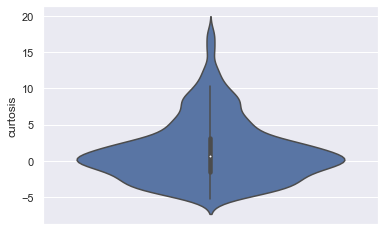

In [13]:
sns.violinplot( y=data['curtosis'])

####  Entropy

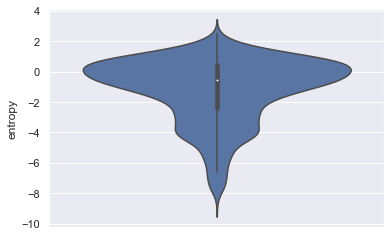

In [14]:
sns.violinplot( y=data['entropy'])

#### Variance

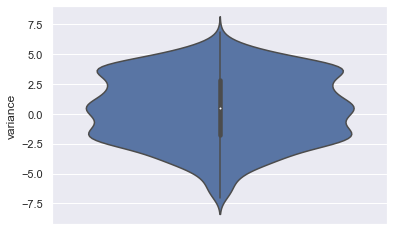

In [15]:
sns.violinplot( y=data['variance'])

#### Skewness

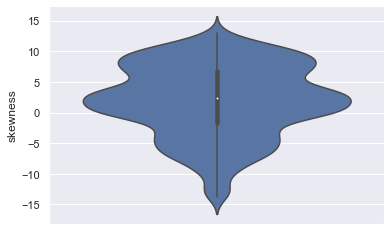

In [19]:
sns.violinplot( y=data['skewness'])

### Relationship between Curtosis & Variance

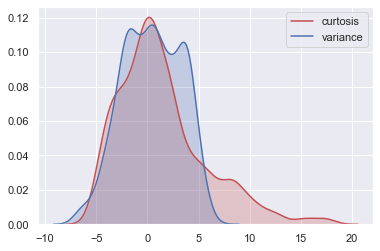

In [18]:
p1=sns.kdeplot(data['curtosis'], shade=True, color="r")
p1=sns.kdeplot(data['variance'], shade=True, color="b")

### Relationship between Curtosis & Entropy

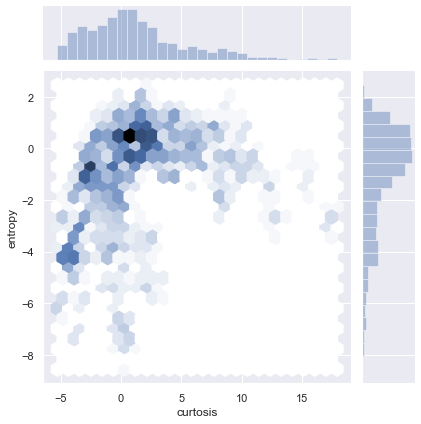

In [21]:
sns.jointplot(x=data['curtosis'], y=data['entropy'], kind='hex', linewidth = 2)

### Relationship between Skewness & Variance

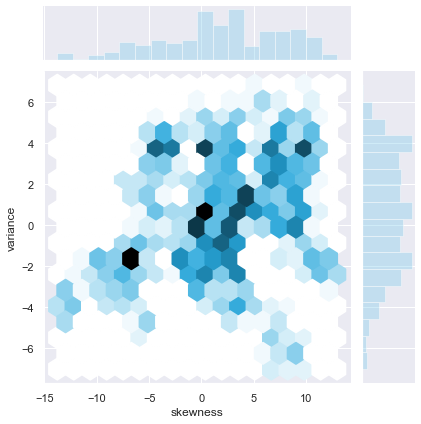

In [26]:
sns.jointplot(x=data['skewness'], y=data['variance'], kind='hex', color = 'skyblue', linewidth = 2)

### Relationship between Variance & Curtosis

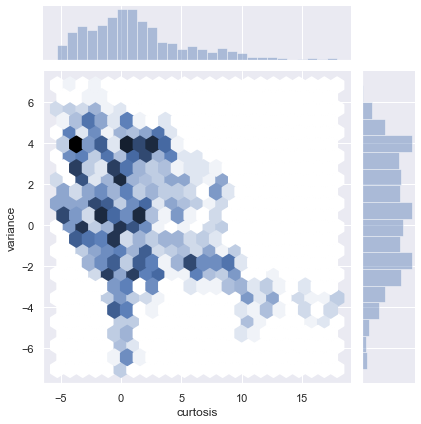

In [25]:
sns.jointplot(x=data['curtosis'], y=data['variance'], kind='hex', linewidth = 2)

### Data Transformation

In [27]:
X = data[['variance', 'skewness' ,'curtosis', 'entropy']]

In [28]:
y = data[['class']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
svc = SVC()


# Creating a dictionary of parameters
parameters = {
    'kernel' : ['linear','rbf'],
    'C' : [0.1,1,5, 7, 10,15]
}

In [46]:
gridCV = GridSearchCV(svc, parameters, cv=5)

In [47]:
# Retraining the model with optimum features
gridFit =gridCV.fit(X_train,y_train.values.ravel())

In [48]:
gridFit

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 7, 10, 15],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
gridFit.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
def printBestParameters(inputFit):
    print ('Best Parameters: {} \n'.format(inputFit.best_params_))

In [51]:
printBestParameters(gridFit)

Best Parameters: {'C': 1, 'kernel': 'rbf'} 



### Predicting New Note

In [52]:
import numpy as np
newNote = np.array([4,7,-2.797,-0.55])
newNote = newNote.reshape(1,-1)


In [53]:
gridFit.predict(newNote)

array([0], dtype=int64)